# Sorting algorithms comparison

##   Main

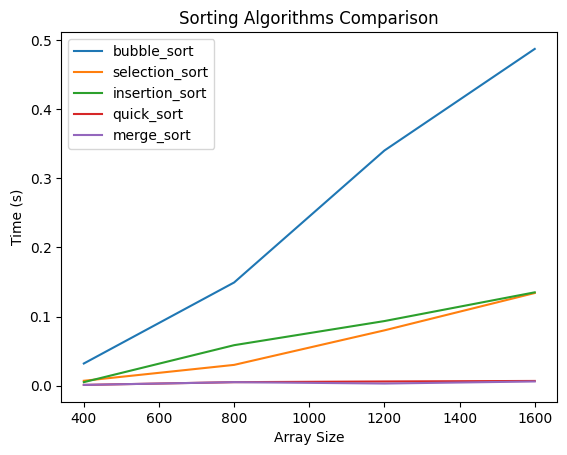

In [65]:
%matplotlib inline
from algorithms import * 
import os
import gc
import time
from matplotlib import pyplot as plt

gc.disable()  # Disable garbage collection for more consistent timing

algorithms = [bubble_sort, selection_sort, insertion_sort, quick_sort, merge_sort]

def plot_results(probes: list, results: dict) -> None:
    for algorithm, times in results.items():
        plt.plot(probes, times, label=algorithm)
    plt.xlabel('Array Size')
    plt.ylabel('Time (s)')
    plt.title('Sorting Algorithms Comparison')
    plt.legend()
    plt.show()

def test_algorithms(algorithms):
    probes = [i * 400 for i in range(1, 5)]
    results = {}

    for algorithm in algorithms:
        times = []
        for probe in probes:
            start = time.time()
            algorithm(text_to_sort[:probe])  
            times.append(time.time() - start)
        
        with open(f'results/{algorithm.__name__}.txt', 'w', encoding='utf-8') as f:
            for word in algorithm(text_to_sort[:probes[-1]]):
                f.write(f'{word} ')
        
        results[algorithm.__name__] = times
    
    plot_results(probes, results)

if not os.path.exists('results'):
    os.makedirs('results')

text_to_sort = []

with open('pan-tadeusz-unix.txt', 'r', encoding='utf-8') as f:
    for line in f:
        text_to_sort.extend(line.strip().split())

test_algorithms(algorithms)

